In [30]:
import requests
import json
import numpy as np
import pandas as pd

from io import BytesIO
from urllib.request import urlopen

import rasterio as rt
from rasterio.mask import mask

%matplotlib inline
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [93]:
from osgeo import gdal
import numpy as np
dem = gdal.Open("GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
gt  = dem.GetGeoTransform()
channel = np.array(dem.GetRasterBand(1).ReadAsArray())
print(channel)

[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.695e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.687e+01  1.688e+01  1.691e+01]]


<ipython-input-162-81a05b1bfb2e>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


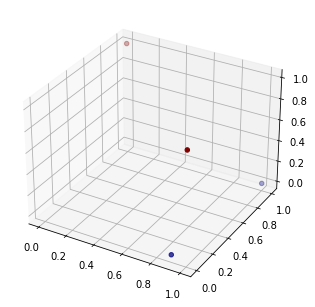

In [162]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)  
plt.show()

In [36]:
address = input("Enter the Belgium address: ") 

Enter the Belgium address: berkenrodelei 20


In [37]:
def get_details(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    
    return info


In [143]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info['polygon'][0]['coordinates'][0]


In [144]:
address_info = get_details(address)
address_info


[[148694.4809063524, 207589.6565300934],
 [148683.01601034403, 207586.73000209033],
 [148684.99501834065, 207578.76097808406],
 [148697.62029835582, 207581.5269940868],
 [148699.2009703517, 207581.87329808623],
 [148697.90228234977, 207586.62984209135],
 [148695.43783435225, 207585.88654609025],
 [148694.4809063524, 207589.6565300934]]

In [146]:
coordinates = pd.DataFrame(address_info,columns = ["X","Y"])

<ipython-input-158-6542b6cf7e33>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


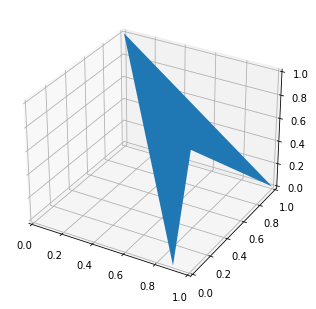

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
x = [0.9,1,1,0]
y = [0,0,1,1]
z = [0,1,0,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts))
plt.show()
